In [ ]:
!pip install opencv-python-headless

import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# Read the image (BGR format)
image = cv2.imread('image.jpeg')

In [ ]:
# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imwrite('image_rgb.jpg', image_rgb)  # Save the RGB image

True

In [ ]:
# Get image dimensions
height, width, channels = image.shape
print(f"Image Dimensions: {height} x {width} x {channels}")


Image Dimensions: 715 x 612 x 3


In [ ]:
# Calculate total pixels
total_pixels = height * width
print(f"Total Pixels: {total_pixels}")

Total Pixels: 437580


In [ ]:
# Convert to Grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('image_gray.jpg', image_gray)  # Save the grayscale image

# Display images with labels
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

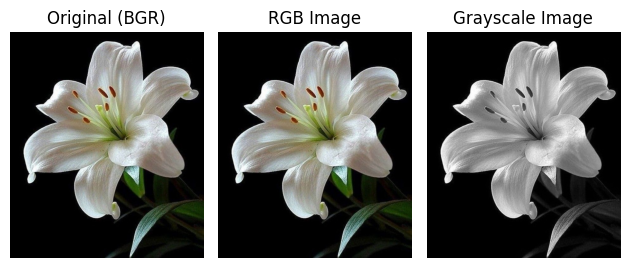

In [ ]:
# Original Image (BGR)
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert for correct color display
plt.title("Original (BGR)")
plt.axis('off')  # Hide axes

# RGB Image
plt.subplot(1, 3, 2)
plt.imshow(image_rgb)
plt.title("RGB Image")
plt.axis('off')

# Grayscale Image
plt.subplot(1, 3, 3)
plt.imshow(image_gray, cmap='gray')  # Display grayscale properly
plt.title("Grayscale Image")
plt.axis('off')

# Show all images
plt.tight_layout()
plt.show()


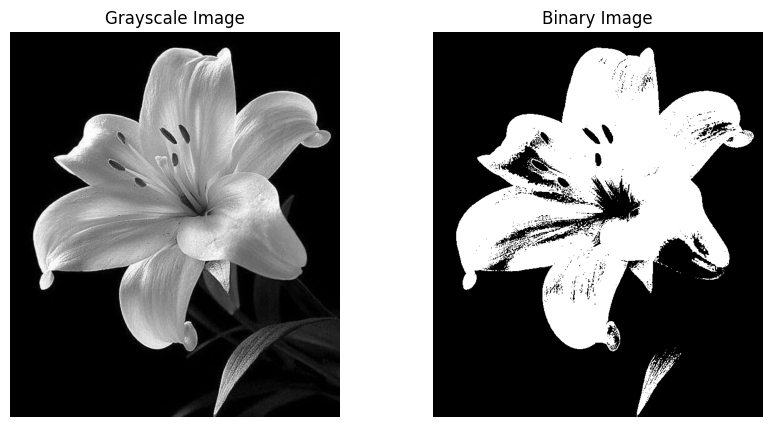

Image Width: 612 pixels
Image Height: 715 pixels
Total Pixels: 437580
Total Black Pixels: 288445


In [ ]:
# Convert Grayscale to Binary using Thresholding
threshold_value = 128
_, binary_image = cv2.threshold(image_gray, threshold_value, 255, cv2.THRESH_BINARY)

# Count black pixels (black pixels are 0 in binary image)
black_pixels = np.sum(binary_image == 0)

# Get image size
height, width = image_gray.shape  # Grayscale images have only (height, width)
total_pixels = height * width

# Display images using Matplotlib (with labels)
plt.figure(figsize=(10, 5))

# Grayscale Image
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

# Binary Image
plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis('off')

plt.show()

# Print results
print(f"Image Width: {width} pixels")
print(f"Image Height: {height} pixels")
print(f"Total Pixels: {total_pixels}")
print(f"Total Black Pixels: {black_pixels}")

In [ ]:
from skimage import filters

In [ ]:
# 📌 1. Sobel Edge Detection
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)  # Detect edges in X direction
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)  # Detect edges in Y direction
sobel = cv2.magnitude(sobel_x, sobel_y)  # Combine X and Y gradients

# 📌 2. Prewitt Edge Detection
prewitt_x = cv2.filter2D(image_gray, cv2.CV_64F, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))  # X direction
prewitt_y = cv2.filter2D(image_gray, cv2.CV_64F, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))  # Y direction
prewitt = cv2.magnitude(prewitt_x, prewitt_y)

# 📌 3. Roberts Cross Edge Detection
roberts = filters.roberts(image_gray)

# 📌 4. Canny Edge Detector
canny_edges = cv2.Canny(image_gray, 100, 200)

# 📌 5. Global Thresholding (Otsu’s Method)
_, global_thresh = cv2.threshold(image_gray, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 📌 6. Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# 📌 7. Edge-Based Segmentation (Using Canny Edges)
edge_based_segmentation = canny_edges  # Already computed in Canny

# 📌 8. Region-Based Segmentation (Watershed Algorithm)
# Convert to color for markers
image_color = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)


In [ ]:
# Compute sure background
kernel = np.ones((3, 3), np.uint8)
sure_bg = cv2.dilate(global_thresh, kernel, iterations=3)

# Compute sure foreground (distance transform)
dist_transform = cv2.distanceTransform(global_thresh, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)

# Compute unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)


In [ ]:
# Label markers
_, markers = cv2.connectedComponents(sure_fg)
markers += 1
markers[unknown == 255] = 0

# Apply Watershed
cv2.watershed(image_color, markers)
image_color[markers == -1] = [0, 0, 255]  # Mark boundaries in red


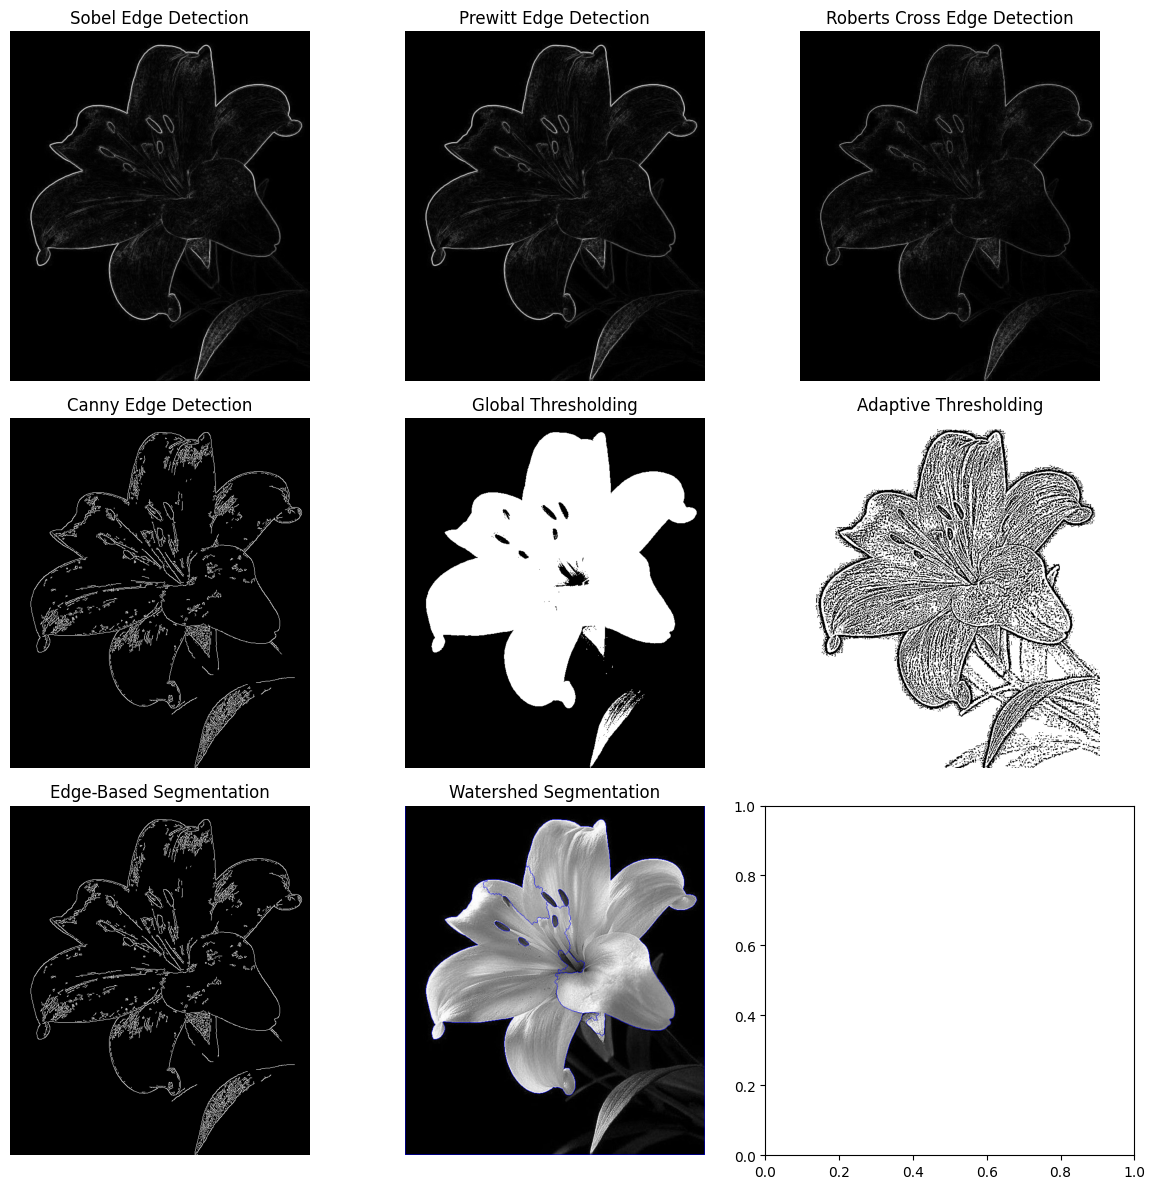

In [ ]:
# 📌 Display all results
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

axes[0, 0].imshow(sobel, cmap='gray')
axes[0, 0].set_title("Sobel Edge Detection")
axes[0, 0].axis('off')

axes[0, 1].imshow(prewitt, cmap='gray')
axes[0, 1].set_title("Prewitt Edge Detection")
axes[0, 1].axis('off')

axes[0, 2].imshow(roberts, cmap='gray')
axes[0, 2].set_title("Roberts Cross Edge Detection")
axes[0, 2].axis('off')

axes[1, 0].imshow(canny_edges, cmap='gray')
axes[1, 0].set_title("Canny Edge Detection")
axes[1, 0].axis('off')

axes[1, 1].imshow(global_thresh, cmap='gray')
axes[1, 1].set_title("Global Thresholding")
axes[1, 1].axis('off')

axes[1, 2].imshow(adaptive_thresh, cmap='gray')
axes[1, 2].set_title("Adaptive Thresholding")
axes[1, 2].axis('off')

axes[2, 0].imshow(edge_based_segmentation, cmap='gray')
axes[2, 0].set_title("Edge-Based Segmentation")
axes[2, 0].axis('off')

axes[2, 1].imshow(image_color)
axes[2, 1].set_title("Watershed Segmentation")
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()